# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

## Objective:  The goal is to determine key factors that influence the price of used cars and provide actionable insights for a used car dealership

In [420]:
## Which car attributes (e.g., make, model, year, mileage, condition, features) have the greatest impact on price?

In [421]:
## Are certain Mak/models more valuable in the used market?

In [422]:
## How do car condition, mileage, and other features affect price

In [423]:
## What trends exist based on region or fuel type
## What recommendations can be given to the dealership to optimize pricing and purchasing

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [424]:
import pandas as pd
import sns

# Load dataset
df = pd.read_csv('data/vehicles.csv')

# Print total number of rows
print("\nTotal Rows:", len(df))

# Print column headers
print("Column Headers:", list(df.columns))

# Print 5 random rows
print("\nRandom 5 Rows of the Dataset:")
print(df.sample(5))




Total Rows: 426880
Column Headers: ['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']

Random 5 Rows of the Dataset:
                id         region  price    year   manufacturer  \
269378  7305686639   finger lakes  38990  2020.0       infiniti   
322798  7316740179       portland      0  2014.0           ford   
237314  7311894851     greensboro      0  2015.0  mercedes-benz   
289220  7316801061     cincinnati   9999  2012.0          buick   
331282  7314684297  lehigh valley  26990  2017.0       cadillac   

                          model condition    cylinders fuel  odometer  \
269378  qx60 luxe sport utility      good  6 cylinders  gas    5279.0   
322798       taurus limited fwd       NaN          NaN  gas       NaN   
237314                  m-class       NaN  6 cylinders  gas   95900.0   
289220                  enclave       NaN    

In [425]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [426]:
# the code below counts and percentages of missing values based on this we can choose what to do with missing values 
# Total number of rows in the DataFrame
total_rows = len(df)

# Count the number of missing values in each column
missing_counts = df.isnull().sum()

# Calculate the percentage of missing values for each column
missing_percentage = (missing_counts / total_rows) * 100

# Combine missing counts and percentages into a single DataFrame
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentage
})

# Sort by the count of missing values in descending order
missing_summary = missing_summary.sort_values(by='Missing Count', ascending=False)

# Display the top columns with the most missing values
print(missing_summary.head(20))

              Missing Count  Missing Percentage
size                 306361           71.767476
cylinders            177678           41.622470
condition            174104           40.785232
VIN                  161042           37.725356
drive                130567           30.586347
paint_color          130203           30.501078
type                  92858           21.752717
manufacturer          17646            4.133714
title_status           8242            1.930753
model                  5277            1.236179
odometer               4400            1.030735
fuel                   3013            0.705819
transmission           2556            0.598763
year                   1205            0.282281
region                    0            0.000000
id                        0            0.000000
price                     0            0.000000
state                     0            0.000000


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

We will assess each column and decide whether to drop it, replace missing values, or keep it based on there importance for business objective 

In [427]:
## Columns that can be dropped are size (71.77 % missing values and will be unreilable) and VIN (not useful for pricing analysis)
df = df.drop(columns=['size', 'VIN'])


In [428]:
# Fill missing values in the 'condition' and 'paint Color' column with "unknown" to ensure consistency in data processing.

df['condition'] = df['condition'].fillna("unknown")
df['paint_color'] = df['paint_color'].fillna("unknown")


In [429]:
# Drop rows where any of the specified columns have missing values.
# Ensures that essential information like price, manufacturer, title status, model, odometer, fuel type, transmission, and year is present.

df = df.dropna(subset=['price','manufacturer', 'title_status', 'model', 'odometer', 'fuel', 'transmission', 'year'])


In [430]:
# Print total number of rows
print("\nTotal Rows:", len(df))

# Print column headers
print("Column Headers:", list(df.columns))


Total Rows: 389604
Column Headers: ['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state']


In [431]:
# Drop Outliers 
# Drop rows where the price is less than 500 or greater than 500,000
df = df.drop(df[(df["price"] < 500) | (df["price"] > 500000)].index)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)
print("\nTotal Rows:", len(df))



Total Rows: 353379


In [432]:
# Count total number of cars for each manufacturer
manufacturer_counts = df['manufacturer'].value_counts()

# Convert to DataFrame for better readability
manufacturer_counts_df = manufacturer_counts.reset_index()
manufacturer_counts_df.columns = ['Manufacturer', 'Total Cars']

# Display the result
print(manufacturer_counts_df)

       Manufacturer  Total Cars
0              ford       61362
1         chevrolet       47426
2            toyota       29639
3             honda       18745
4            nissan       16163
5              jeep       16141
6               ram       14852
7               gmc       14487
8               bmw       12906
9             dodge       11028
10    mercedes-benz        9548
11          hyundai        8776
12           subaru        8517
13       volkswagen        8265
14            lexus        7353
15              kia        7092
16             audi        6814
17         cadillac        6148
18            acura        5429
19         chrysler        5255
20            buick        4923
21            mazda        4745
22         infiniti        4318
23          lincoln        3831
24            volvo        3109
25       mitsubishi        2891
26             mini        2134
27          pontiac        2127
28           jaguar        1829
29            rover        1618
30      

In [433]:
from IPython.display import display

display(manufacturer_counts_df)

,Manufacturer,Total Cars
0,ford,61362
1,chevrolet,47426
2,toyota,29639
3,honda,18745
4,nissan,16163
5,jeep,16141
6,ram,14852
7,gmc,14487
8,bmw,12906
9,dodge,11028


In [434]:
# enrich the data to map Cars with country to eventually see if we see patterns based on the manafucturer country 

manufacturer_location_map = {
    "ford": "America", "chevrolet": "America", "gmc": "America", "dodge": "America", "cadillac": "America",
    "chrysler": "America", "buick": "America", "lincoln": "America", "ram": "America", "tesla": "America",

    "toyota": "Japan", "honda": "Japan", "nissan": "Japan", "mazda": "Japan", "subaru": "Japan",
    "mitsubishi": "Japan", "lexus": "Japan", "acura": "Japan", "infiniti": "Japan", "suzuki": "Japan",

    "hyundai": "Korea", "kia": "Korea", "genesis": "Korea",

    "mercedes-benz": "Germany", "bmw": "Germany", "audi": "Germany", "volkswagen": "Germany",
    "porsche": "Germany", "opel": "Germany",

    "fiat": "Italy", "alfa romeo": "Italy", "ferrari": "Italy", "lamborghini": "Italy", "maserati": "Italy",

    "land rover": "UK", "jaguar": "UK", "mini": "UK", "bentley": "UK", "rolls-royce": "UK", "aston martin": "UK",

    # Default category for other manufacturers
    "others": "Others"
}

# Assign manufacturer locations based on mapping
df["manufacturer_location"] = df["manufacturer"].map(lambda x: manufacturer_location_map.get(str(x).lower(), "Others"))
df['manufacturer_location'] = df['manufacturer_location'].fillna("others")
manufacturer_location_counts = df['manufacturer_location'].value_counts()
print(manufacturer_location_counts)


manufacturer_location
America    170100
Japan       97800
Germany     38741
Others      26099
Korea       15868
UK           3974
Italy         797
Name: count, dtype: int64


In [435]:
# Calculate the average price per manufacturer
avg_price_by_manufacturer = df.groupby("manufacturer")["price"].mean().reset_index()
avg_price_by_manufacturer.columns = ["Manufacturer", "Average Price"]

# Calculate the average price per manufacturer location (country)
avg_price_by_location = df.groupby("manufacturer_location")["price"].mean().reset_index()
avg_price_by_location.columns = ["Manufacturer Location", "Average Price"]

print(avg_price_by_manufacturer)
print(avg_price_by_location)


       Manufacturer  Average Price
0             acura   21542.980291
1        alfa-romeo   29480.205189
2      aston-martin   61136.619048
3              audi   25359.327121
4               bmw   21085.292190
5             buick   15566.705667
6          cadillac   21402.526513
7         chevrolet   20383.913528
8          chrysler   10957.004948
9            datsun   16176.084746
10            dodge   16513.550236
11          ferrari  135260.951613
12             fiat   12587.409524
13             ford   21386.300023
14              gmc   25624.114171
15  harley-davidson   13532.718182
16            honda   11728.314110
17          hyundai   12171.573838
18         infiniti   21436.748031
19           jaguar   27877.569710
20             jeep   20571.315408
21              kia   12889.759588
22       land rover   15103.000000
23            lexus   20847.643411
24          lincoln   20825.700078
25            mazda   13657.918230
26    mercedes-benz   22483.891705
27          mercury 

In [436]:
# calculate the average Price by Year 

avg_price_by_year = df.groupby("year")["price"].mean().reset_index()
avg_price_by_year.columns = ["year", "Average Price"]




print(avg_price_by_year)
#print(avg_price_by_location)

       year  Average Price
0    1900.0   19375.000000
1    1905.0    3990.000000
2    1913.0   56000.000000
3    1915.0    5000.000000
4    1918.0   16000.000000
..      ...            ...
102  2018.0   30290.288694
103  2019.0   33987.556197
104  2020.0   37674.860302
105  2021.0   45933.034686
106  2022.0   19316.068966

[107 rows x 2 columns]


In [437]:
Year_by_counts = df['year'].value_counts()

# Convert to DataFrame for better readability
year_counts_df = Year_by_counts.reset_index()
year_counts_df.columns = ['year', 'Total Cars']

# Display the result
print(year_counts_df)

       year  Total Cars
0    2018.0       30056
1    2017.0       29575
2    2013.0       25619
3    2015.0       25289
4    2014.0       24623
..      ...         ...
102  1943.0           1
103  1915.0           1
104  1921.0           1
105  1905.0           1
106  1945.0           1

[107 rows x 2 columns]


In [438]:
# Count occurrences of each year
Year_by_counts = df['year'].value_counts()

# Convert to DataFrame for better readability
year_counts_df = Year_by_counts.reset_index()
year_counts_df.columns = ['year', 'Total Cars']

# Filter out rows where 'Total Cars' is less than 100
year_counts_df = year_counts_df[year_counts_df['Total Cars'] >= 1000]

# Display the result
print(year_counts_df)


      year  Total Cars
0   2018.0       30056
1   2017.0       29575
2   2013.0       25619
3   2015.0       25289
4   2014.0       24623
5   2016.0       24254
6   2019.0       21300
7   2012.0       20264
8   2011.0       17443
9   2020.0       16686
10  2008.0       14745
11  2010.0       13667
12  2007.0       12786
13  2006.0       10779
14  2009.0       10573
15  2005.0        9120
16  2004.0        7873
17  2003.0        6245
18  2002.0        4845
19  2001.0        3785
20  2000.0        3050
21  1999.0        2573
22  1998.0        1673
23  1997.0        1458
24  2021.0        1355
25  1996.0        1074
26  1995.0        1037


In [439]:
# Define bins and labels (convert max odometer value to int)
max_odometer = int(df['odometer'].max())  # Convert to integer to avoid NumPy float issue
bin_edges = list(range(0, max_odometer + 5000, 5000))  # Create bins

# Create bin labels dynamically
bin_labels = [f"{bin_edges[i]} to {bin_edges[i+1]-1}" for i in range(len(bin_edges)-1)]

# Create odometer range column
df['odometer_range'] = pd.cut(df['odometer'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df['car_age'] = 2019 - df['year']



In [440]:
# Print total number of rows
print("\nTotal Rows:", len(df))

# Print column headers
print("Column Headers:", list(df.columns))


Total Rows: 353379
Column Headers: ['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'state', 'manufacturer_location', 'odometer_range', 'car_age']


In [441]:
print("\nRandom 5 Rows of the Dataset:")
print(df.sample(10))


Random 5 Rows of the Dataset:
                id                region  price    year manufacturer  \
315360  7315111474           san antonio   8999  2009.0         ford   
61433   7316365495                denver   8999  2008.0         ford   
282278  7315919310          rhode island  27500  1966.0         ford   
266966  7316749635              portland  24990  2018.0   volkswagen   
18847   7309969720           bakersfield  26990  2018.0        acura   
336133  7306932416     olympic peninsula   2400  2001.0         ford   
293092  7314757190             knoxville  22942  2019.0        honda   
6349    7304952512    anchorage / mat-su   2500  2002.0      mercury   
28721   7310294342      mendocino county    541  2011.0          ram   
2998    7304327097  huntsville / decatur   2900  2007.0       nissan   

                      model  condition    cylinders    fuel  odometer  \
315360                focus  excellent  4 cylinders     gas   33128.0   
61433              explorer  e

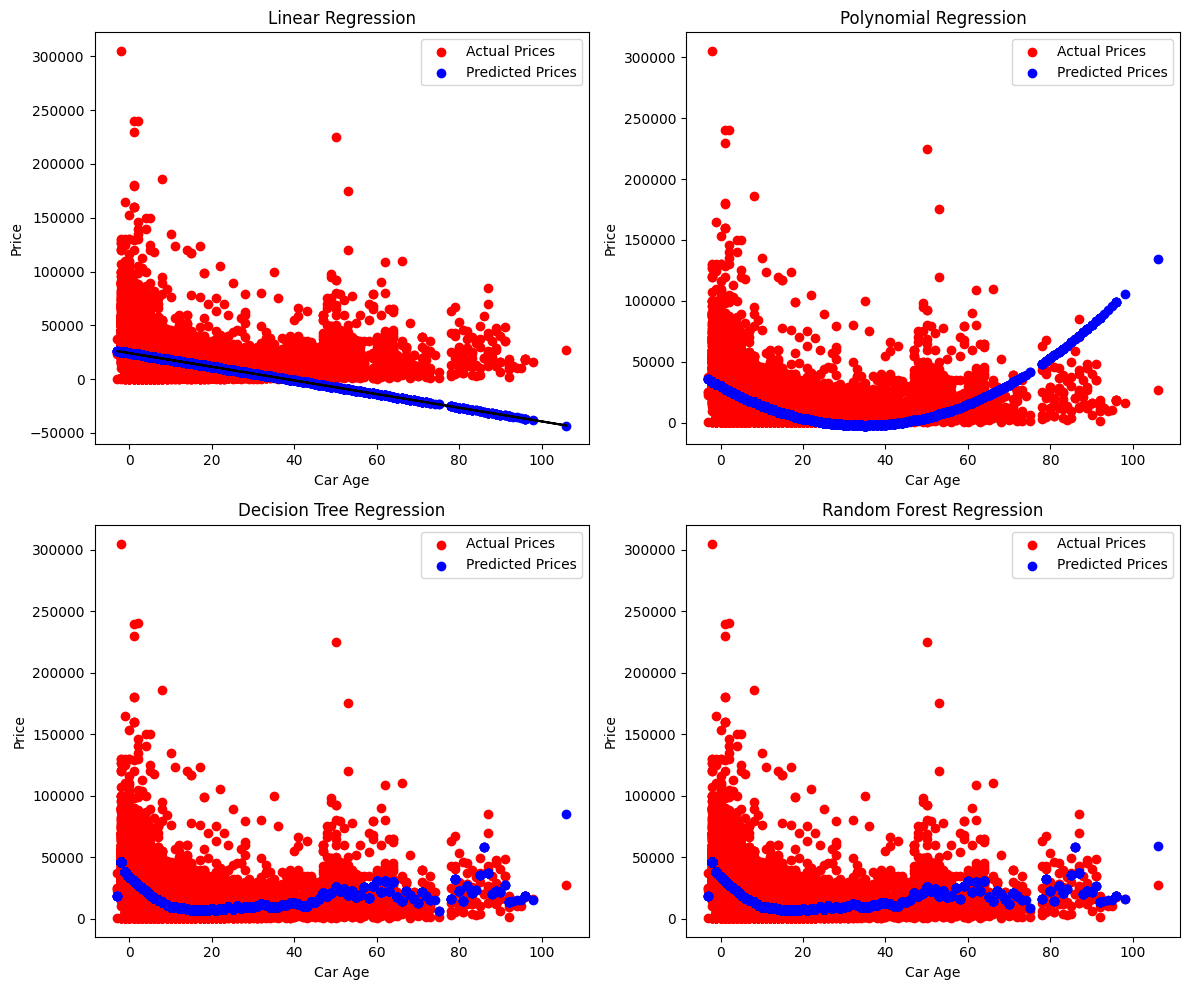

In [442]:
# examine different Models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error





# Splitting the dataset into Training and Test set
X = df[['car_age']]  # Independent Variable
y = df['price']  # Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Polynomial Regression (Degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Visualization of Results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter Plot for Linear Regression
axes[0, 0].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[0, 0].scatter(X_test, y_pred_linear, color='blue', label="Predicted Prices")
axes[0, 0].plot(X_test, y_pred_linear, color='black')
axes[0, 0].set_title("Linear Regression")
axes[0, 0].set_xlabel("Car Age")
axes[0, 0].set_ylabel("Price")
axes[0, 0].legend()

# Scatter Plot for Polynomial Regression
axes[0, 1].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[0, 1].scatter(X_test, y_pred_poly, color='blue', label="Predicted Prices")
axes[0, 1].set_title("Polynomial Regression")
axes[0, 1].set_xlabel("Car Age")
axes[0, 1].set_ylabel("Price")
axes[0, 1].legend()

# Scatter Plot for Decision Tree Regression
axes[1, 0].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[1, 0].scatter(X_test, y_pred_dt, color='blue', label="Predicted Prices")
axes[1, 0].set_title("Decision Tree Regression")
axes[1, 0].set_xlabel("Car Age")
axes[1, 0].set_ylabel("Price")
axes[1, 0].legend()

# Scatter Plot for Random Forest Regression
axes[1, 1].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[1, 1].scatter(X_test, y_pred_rf, color='blue', label="Predicted Prices")
axes[1, 1].set_title("Random Forest Regression")
axes[1, 1].set_xlabel("Car Age")
axes[1, 1].set_ylabel("Price")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Display Model Performance
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression", "Decision Tree", "Random Forest"],
    "MSE": [
        mean_squared_error(y_test, y_pred_linear),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf),
    ]
})

# tools.display_dataframe_to_user(name="Regression Model Performance", dataframe=results_df)


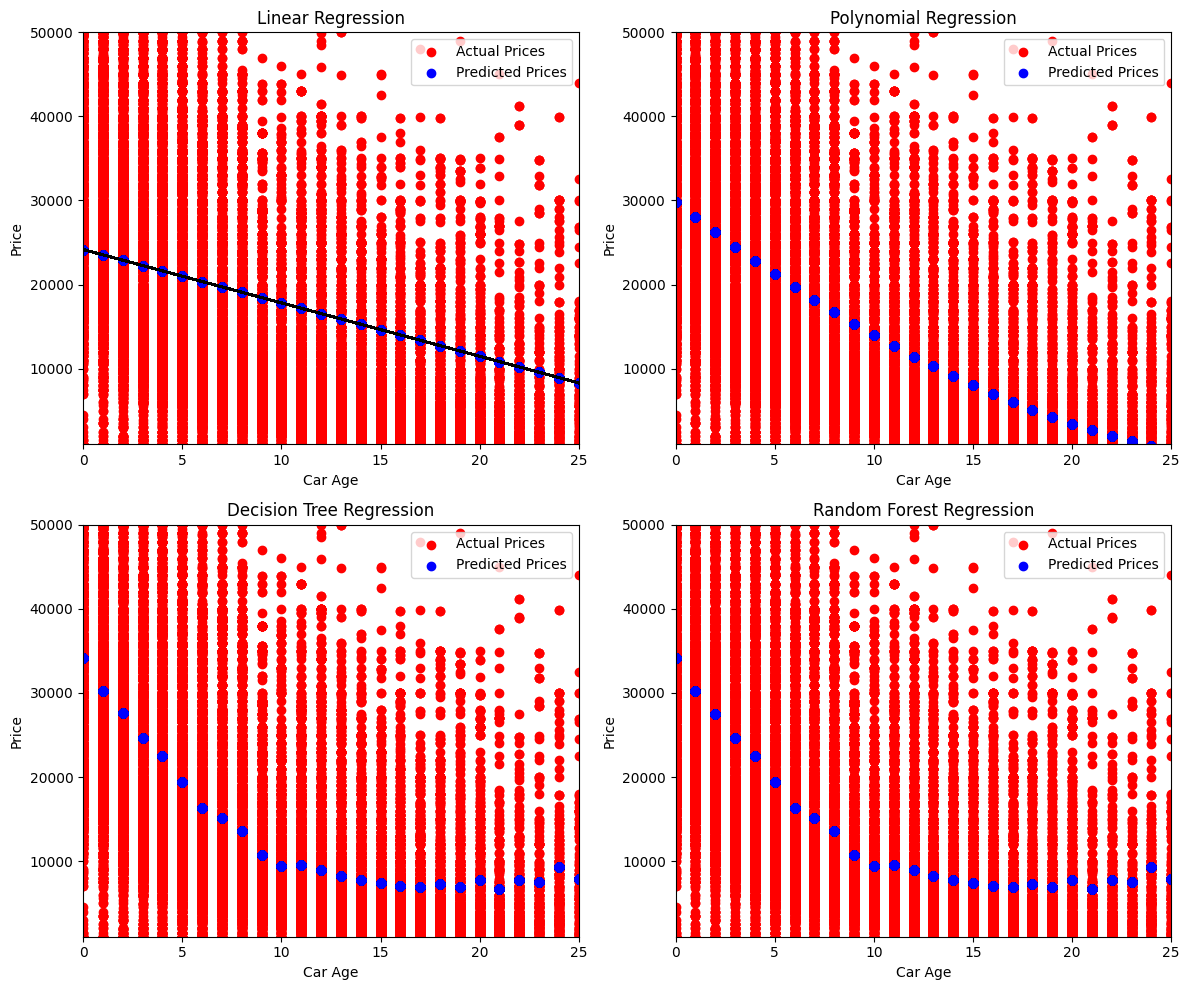

                   Model           MSE
0      Linear Regression  1.793255e+08
1  Polynomial Regression  1.404569e+08
2          Decision Tree  1.236793e+08
3          Random Forest  1.236423e+08


In [443]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Splitting the dataset into Training and Test set
X = df[['car_age']]  # Independent Variable
y = df['price']  # Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Polynomial Regression (Degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Visualization of Results with Custom Axis Limits
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Set axis limits
x_min, x_max = 0, 25
y_min, y_max = 1000, 50000

# Scatter Plot for Linear Regression
axes[0, 0].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[0, 0].scatter(X_test, y_pred_linear, color='blue', label="Predicted Prices")
axes[0, 0].plot(X_test, y_pred_linear, color='black')
axes[0, 0].set_title("Linear Regression")
axes[0, 0].set_xlabel("Car Age")
axes[0, 0].set_ylabel("Price")
axes[0, 0].set_xlim(x_min, x_max)
axes[0, 0].set_ylim(y_min, y_max)
axes[0, 0].legend()

# Scatter Plot for Polynomial Regression
axes[0, 1].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[0, 1].scatter(X_test, y_pred_poly, color='blue', label="Predicted Prices")
axes[0, 1].set_title("Polynomial Regression")
axes[0, 1].set_xlabel("Car Age")
axes[0, 1].set_ylabel("Price")
axes[0, 1].set_xlim(x_min, x_max)
axes[0, 1].set_ylim(y_min, y_max)
axes[0, 1].legend()

# Scatter Plot for Decision Tree Regression
axes[1, 0].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[1, 0].scatter(X_test, y_pred_dt, color='blue', label="Predicted Prices")
axes[1, 0].set_title("Decision Tree Regression")
axes[1, 0].set_xlabel("Car Age")
axes[1, 0].set_ylabel("Price")
axes[1, 0].set_xlim(x_min, x_max)
axes[1, 0].set_ylim(y_min, y_max)
axes[1, 0].legend()

# Scatter Plot for Random Forest Regression
axes[1, 1].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[1, 1].scatter(X_test, y_pred_rf, color='blue', label="Predicted Prices")
axes[1, 1].set_title("Random Forest Regression")
axes[1, 1].set_xlabel("Car Age")
axes[1, 1].set_ylabel("Price")
axes[1, 1].set_xlim(x_min, x_max)
axes[1, 1].set_ylim(y_min, y_max)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Display Model Performance
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression", "Decision Tree", "Random Forest"],
    "MSE": [
        mean_squared_error(y_test, y_pred_linear),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf),
    ]
})

print(results_df)


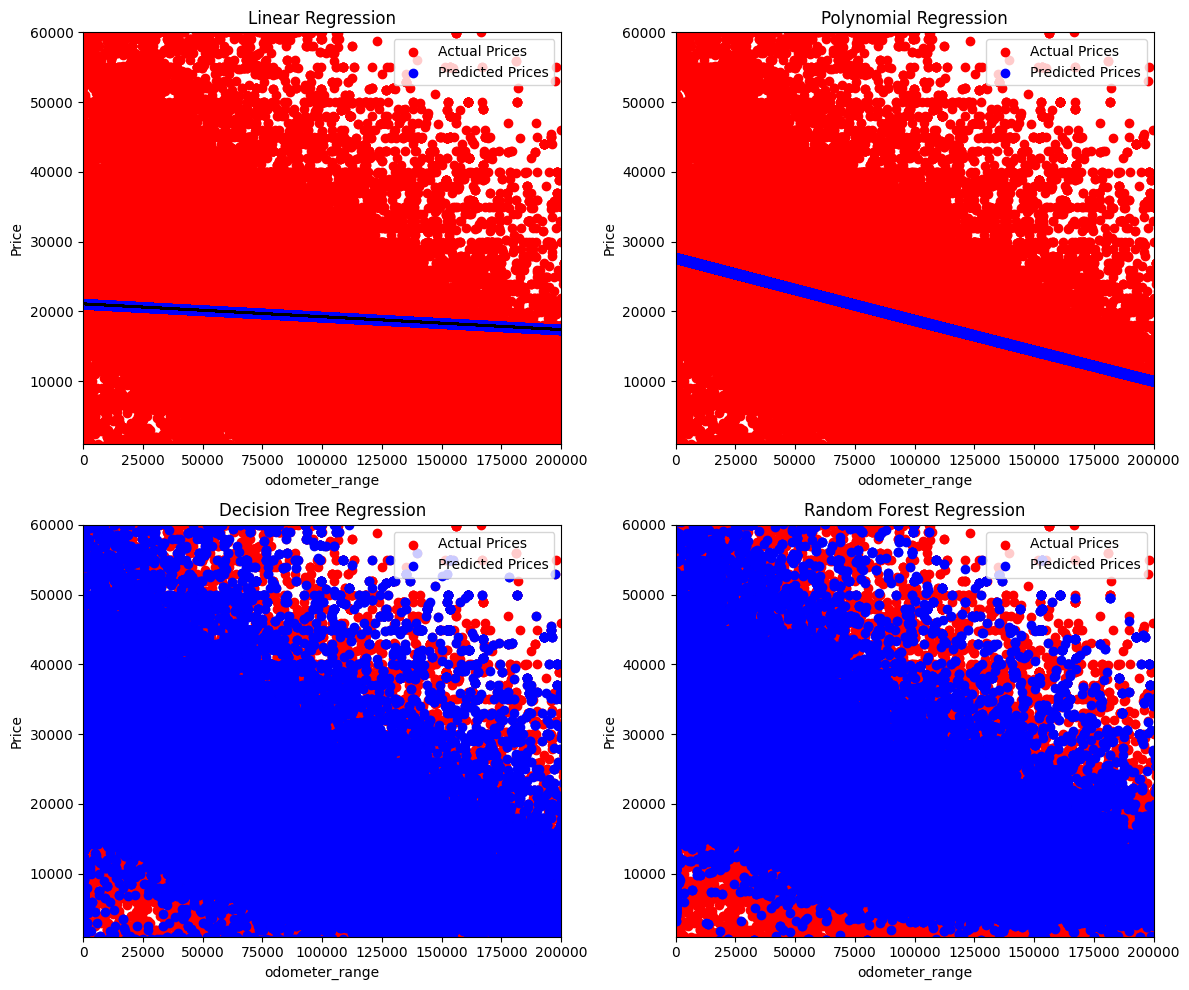

                   Model           MSE
0      Linear Regression  2.027172e+08
1  Polynomial Regression  1.671797e+08
2          Decision Tree  1.015096e+08
3          Random Forest  9.362440e+07


In [461]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Splitting the dataset into Training and Test set
X = df[['odometer']]  # Independent Variable
y = df['price']  # Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Polynomial Regression (Degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Visualization of Results with Custom Axis Limits
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Set axis limits
x_min, x_max = 0, 200000
y_min, y_max = 1000, 60000

# Scatter Plot for Linear Regression
axes[0, 0].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[0, 0].scatter(X_test, y_pred_linear, color='blue', label="Predicted Prices")
axes[0, 0].plot(X_test, y_pred_linear, color='black')
axes[0, 0].set_title("Linear Regression")
axes[0, 0].set_xlabel("odometer_range")
axes[0, 0].set_ylabel("Price")
axes[0, 0].set_xlim(x_min, x_max)
axes[0, 0].set_ylim(y_min, y_max)
axes[0, 0].legend()

# Scatter Plot for Polynomial Regression
axes[0, 1].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[0, 1].scatter(X_test, y_pred_poly, color='blue', label="Predicted Prices")
axes[0, 1].set_title("Polynomial Regression")
axes[0, 1].set_xlabel("odometer_range")
axes[0, 1].set_ylabel("Price")
axes[0, 1].set_xlim(x_min, x_max)
axes[0, 1].set_ylim(y_min, y_max)
axes[0, 1].legend()

# Scatter Plot for Decision Tree Regression
axes[1, 0].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[1, 0].scatter(X_test, y_pred_dt, color='blue', label="Predicted Prices")
axes[1, 0].set_title("Decision Tree Regression")
axes[1, 0].set_xlabel("odometer_range")
axes[1, 0].set_ylabel("Price")
axes[1, 0].set_xlim(x_min, x_max)
axes[1, 0].set_ylim(y_min, y_max)
axes[1, 0].legend()

# Scatter Plot for Random Forest Regression
axes[1, 1].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[1, 1].scatter(X_test, y_pred_rf, color='blue', label="Predicted Prices")
axes[1, 1].set_title("Random Forest Regression")
axes[1, 1].set_xlabel("odometer_range")
axes[1, 1].set_ylabel("Price")
axes[1, 1].set_xlim(x_min, x_max)
axes[1, 1].set_ylim(y_min, y_max)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# 📊 Display Model Performance
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression", "Decision Tree", "Random Forest"],
    "MSE": [
        mean_squared_error(y_test, y_pred_linear),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf),
    ]
})

print(results_df)

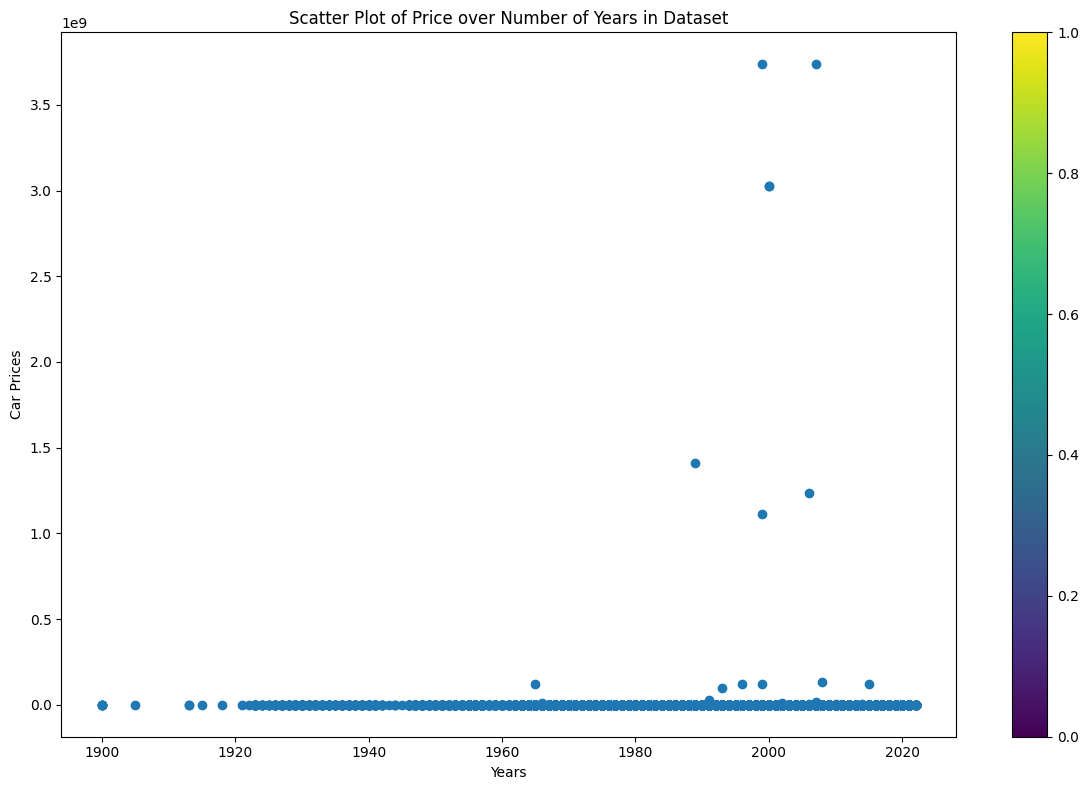

In [63]:
# Scatter plot of year of manufacture vs car price
plt.figure(figsize=(12,8))
plt.scatter(df['year'], df['price'])
 
# Adding Title to the Plot
plt.title("Scatter Plot of Price over Number of Years in Dataset")
 
# Setting the X and Y labels
plt.xlabel('Years')
plt.ylabel('Car Prices')
plt.colorbar()
 
plt.show()

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

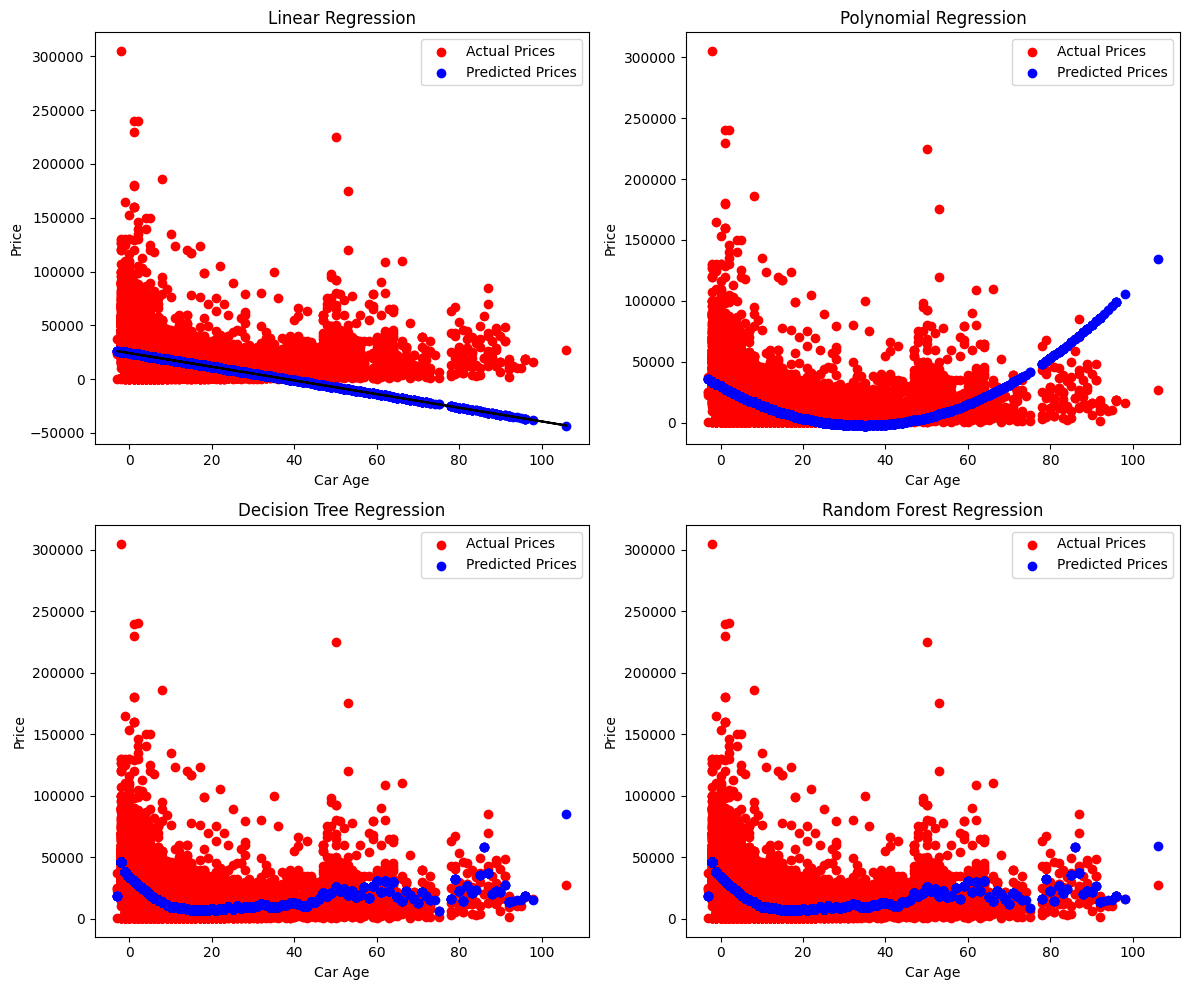

In [459]:
# examine different Models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error





# Splitting the dataset into Training and Test set
X = df[['car_age']]  # Independent Variable
y = df['price']  # Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Polynomial Regression (Degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Visualization of Results
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Scatter Plot for Linear Regression
axes[0, 0].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[0, 0].scatter(X_test, y_pred_linear, color='blue', label="Predicted Prices")
axes[0, 0].plot(X_test, y_pred_linear, color='black')
axes[0, 0].set_title("Linear Regression")
axes[0, 0].set_xlabel("Car Age")
axes[0, 0].set_ylabel("Price")
axes[0, 0].legend()

# Scatter Plot for Polynomial Regression
axes[0, 1].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[0, 1].scatter(X_test, y_pred_poly, color='blue', label="Predicted Prices")
axes[0, 1].set_title("Polynomial Regression")
axes[0, 1].set_xlabel("Car Age")
axes[0, 1].set_ylabel("Price")
axes[0, 1].legend()

# Scatter Plot for Decision Tree Regression
axes[1, 0].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[1, 0].scatter(X_test, y_pred_dt, color='blue', label="Predicted Prices")
axes[1, 0].set_title("Decision Tree Regression")
axes[1, 0].set_xlabel("Car Age")
axes[1, 0].set_ylabel("Price")
axes[1, 0].legend()

# Scatter Plot for Random Forest Regression
axes[1, 1].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[1, 1].scatter(X_test, y_pred_rf, color='blue', label="Predicted Prices")
axes[1, 1].set_title("Random Forest Regression")
axes[1, 1].set_xlabel("Car Age")
axes[1, 1].set_ylabel("Price")
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Display Model Performance
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression", "Decision Tree", "Random Forest"],
    "MSE": [
        mean_squared_error(y_test, y_pred_linear),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf),
    ]
})


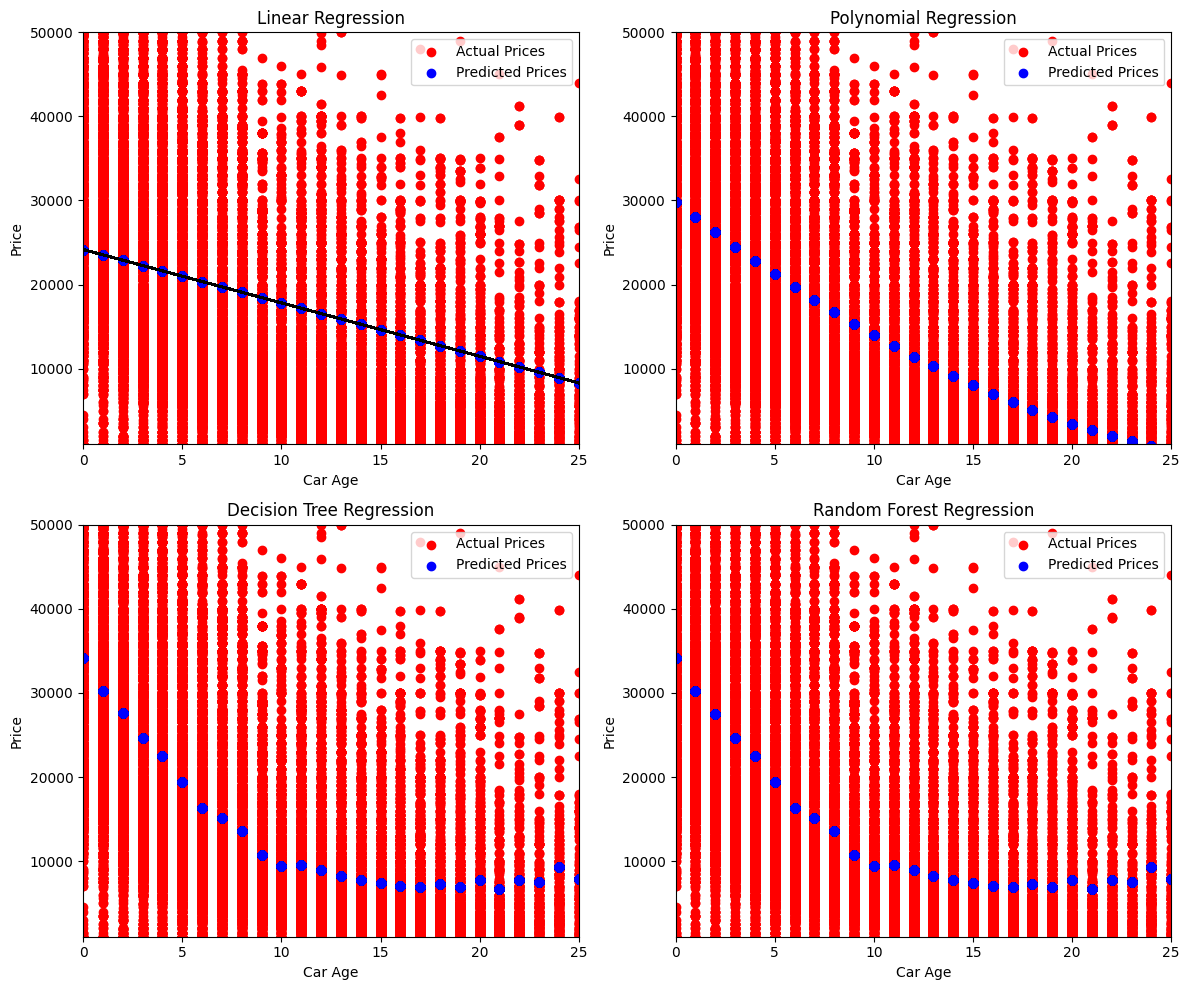

                   Model           MSE
0      Linear Regression  1.793255e+08
1  Polynomial Regression  1.404569e+08
2          Decision Tree  1.236793e+08
3          Random Forest  1.236423e+08


In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Splitting the dataset into Training and Test set
X = df[['car_age']]  # Independent Variable
y = df['price']  # Target Variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Polynomial Regression (Degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)
y_pred_poly = poly_reg.predict(X_poly_test)

# Decision Tree Regression
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)

# Random Forest Regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Visualization of Results with Custom Axis Limits
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Set axis limits
x_min, x_max = 0, 25
y_min, y_max = 1000, 50000

# Scatter Plot for Linear Regression
axes[0, 0].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[0, 0].scatter(X_test, y_pred_linear, color='blue', label="Predicted Prices")
axes[0, 0].plot(X_test, y_pred_linear, color='black')
axes[0, 0].set_title("Linear Regression")
axes[0, 0].set_xlabel("Car Age")
axes[0, 0].set_ylabel("Price")
axes[0, 0].set_xlim(x_min, x_max)
axes[0, 0].set_ylim(y_min, y_max)
axes[0, 0].legend()

# Scatter Plot for Polynomial Regression
axes[0, 1].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[0, 1].scatter(X_test, y_pred_poly, color='blue', label="Predicted Prices")
axes[0, 1].set_title("Polynomial Regression")
axes[0, 1].set_xlabel("Car Age")
axes[0, 1].set_ylabel("Price")
axes[0, 1].set_xlim(x_min, x_max)
axes[0, 1].set_ylim(y_min, y_max)
axes[0, 1].legend()

# Scatter Plot for Decision Tree Regression
axes[1, 0].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[1, 0].scatter(X_test, y_pred_dt, color='blue', label="Predicted Prices")
axes[1, 0].set_title("Decision Tree Regression")
axes[1, 0].set_xlabel("Car Age")
axes[1, 0].set_ylabel("Price")
axes[1, 0].set_xlim(x_min, x_max)
axes[1, 0].set_ylim(y_min, y_max)
axes[1, 0].legend()

# Scatter Plot for Random Forest Regression
axes[1, 1].scatter(X_test, y_test, color='red', label="Actual Prices")
axes[1, 1].scatter(X_test, y_pred_rf, color='blue', label="Predicted Prices")
axes[1, 1].set_title("Random Forest Regression")
axes[1, 1].set_xlabel("Car Age")
axes[1, 1].set_ylabel("Price")
axes[1, 1].set_xlim(x_min, x_max)
axes[1, 1].set_ylim(y_min, y_max)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# 📊 Display Model Performance
results_df = pd.DataFrame({
    "Model": ["Linear Regression", "Polynomial Regression", "Decision Tree", "Random Forest"],
    "MSE": [
        mean_squared_error(y_test, y_pred_linear),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_dt),
        mean_squared_error(y_test, y_pred_rf),
    ]
})

print(results_df)

import pandas as pd

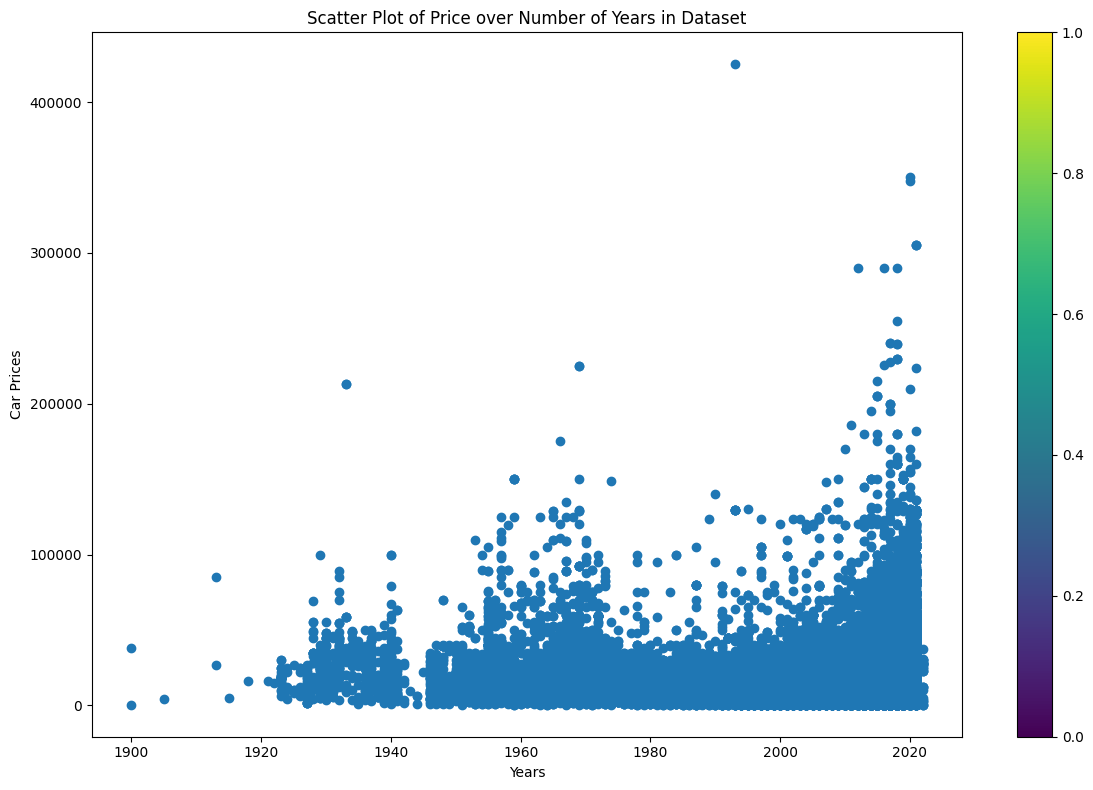

In [448]:
# Scatter plot of year of manufacture vs car price
plt.figure(figsize=(12,8))
plt.scatter(df['year'], df['price'])
 
# Adding Title to the Plot
plt.title("Scatter Plot of Price over Number of Years in Dataset")
 
# Setting the X and Y labels
plt.xlabel('Years')
plt.ylabel('Car Prices')
plt.colorbar()
 
plt.show()

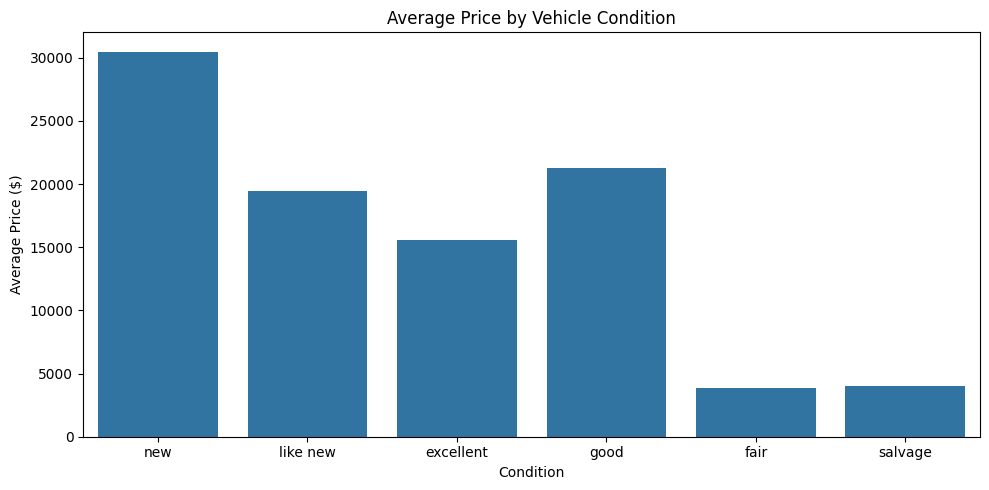

In [451]:
import seaborn as sns
import matplotlib.pyplot as plt

avg_price_by_condition = df.groupby("condition")["price"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="condition", y="price", data=avg_price_by_condition, order=["new", "like new", "excellent", "good", "fair", "salvage"])
plt.title("Average Price by Vehicle Condition")
plt.xlabel("Condition")
plt.ylabel("Average Price ($)")
plt.show()

C:\Users\e968824\AppData\Local\Temp\ipykernel_46264\3893465836.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="drive", y="price", data=avg_price_by_drive, palette="magma")


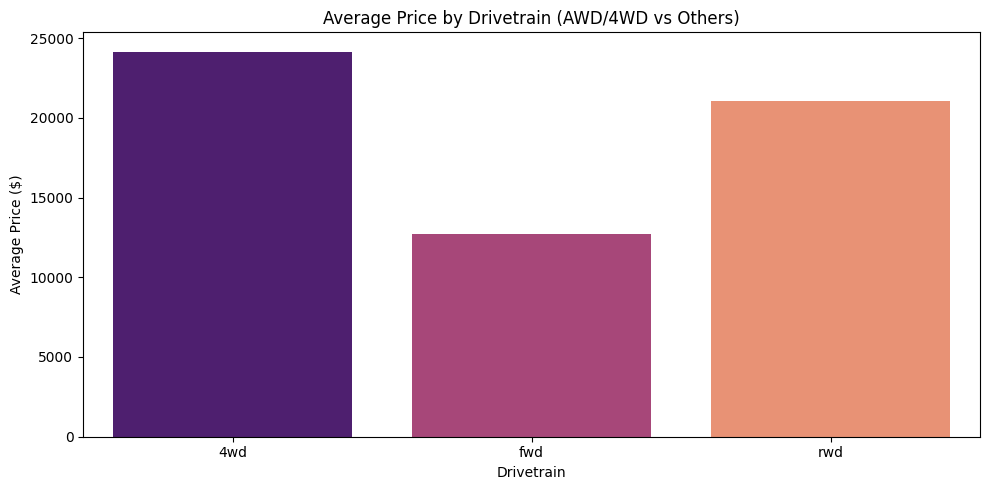

In [453]:
avg_price_by_drive = df.groupby("drive")["price"].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x="drive", y="price", data=avg_price_by_drive, palette="magma")
plt.title("Average Price by Drivetrain (AWD/4WD vs Others)")
plt.xlabel("Drivetrain")
plt.ylabel("Average Price ($)")
plt.show()

C:\Users\e968824\AppData\Local\Temp\ipykernel_46264\3591550717.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="fuel", y="price", data=avg_price_by_fuel, palette="viridis")


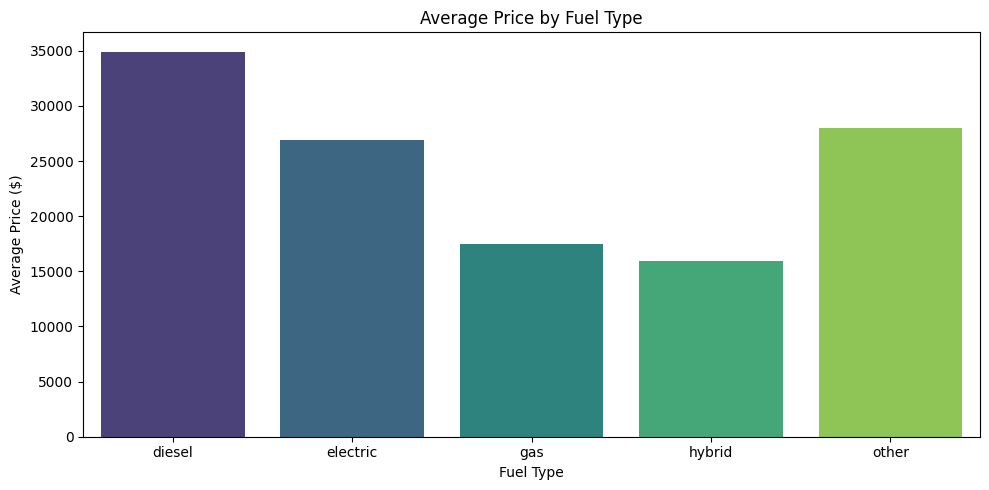

In [458]:
avg_price_by_fuel = df.groupby("fuel")["price"].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x="fuel", y="price", data=avg_price_by_fuel, palette="viridis")
plt.title("Average Price by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Average Price ($)")
plt.show()

C:\Users\e968824\AppData\Local\Temp\ipykernel_46264\528330141.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="manufacturer", x="price", data=avg_price_by_manufacturer.head(10), palette="coolwarm")


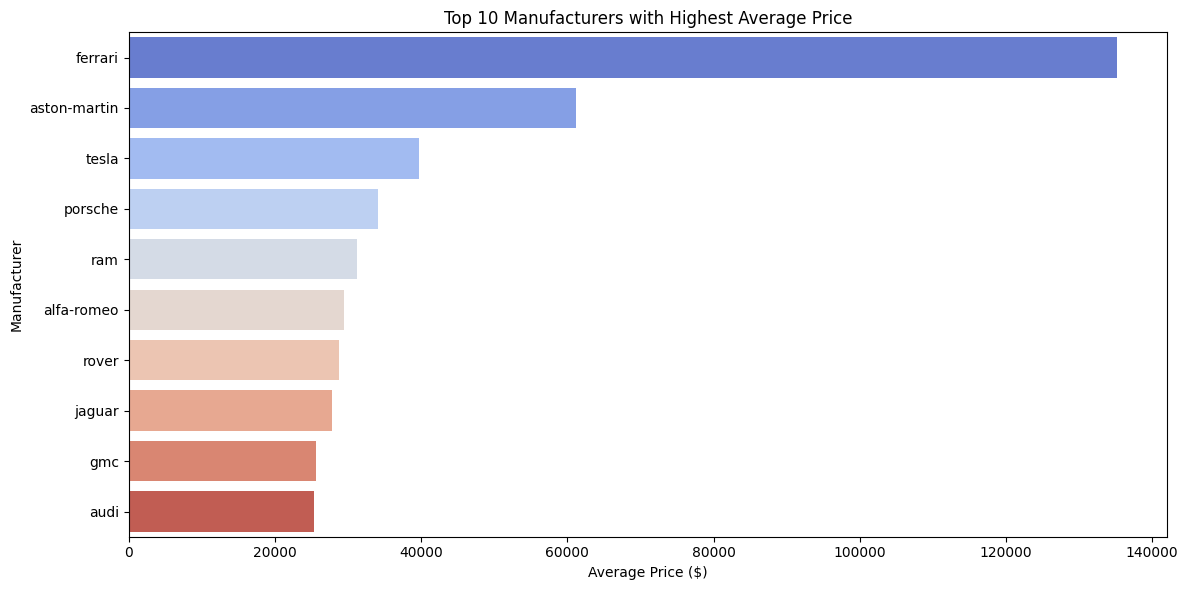

In [457]:
# Compute average price by manufacturer
avg_price_by_manufacturer = df.groupby("manufacturer")["price"].mean().reset_index().sort_values(by="price", ascending=False)

# Plot average price by top manufacturers
plt.figure(figsize=(12,6))
sns.barplot(y="manufacturer", x="price", data=avg_price_by_manufacturer.head(10), palette="coolwarm")
plt.title("Top 10 Manufacturers with Highest Average Price")
plt.xlabel("Average Price ($)")
plt.ylabel("Manufacturer")
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [ ]:
#Here are top insights based on various mode 
#Car Condition and Age are important and priced higher

In [ ]:
# Diesel Fuel type are Higher followed by gas and other Fuel types

In [ ]:
# Luxury Manufactuers are higher priced and  valued more 

In [ ]:
# Models 
# Decision tree and Random Forest Models have the lowest MSE 


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.